<a href="https://colab.research.google.com/github/abhyagarg22/fractal-implementation/blob/main/fractal_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

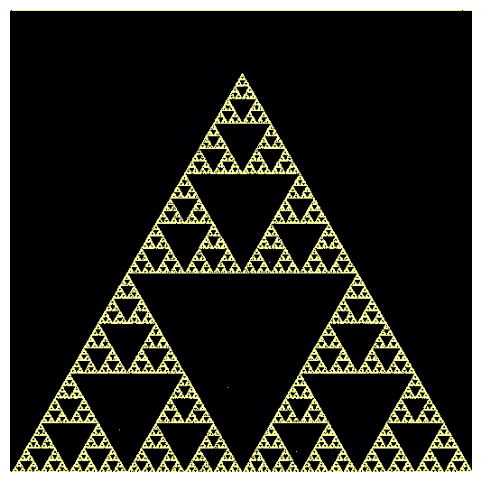

In [23]:
import torch
import matplotlib.pyplot as plt

# Parameters
size = 512  # Image size (size x size)
iterations = 100000  # Number of points to generate

# Define the three corners of the triangle
corners = torch.tensor([[0.0, 0.0],
                        [1.0, 0.0],
                        [0.5, 0.866]])  # height = sqrt(3)/2 for equilateral

# Initialize the first point randomly
point = torch.rand(1, 2) #torch.rand(1, 2) generates a tensor with shape (1,2) → one 2D point.

# Store all points
points = torch.zeros(iterations, 2) #Pre-allocates a tensor points to store every point you generate.

for i in range(iterations):
    # Randomly select one of the three corners
    corner = corners[torch.randint(0, 3, (1,))] #torch.randint(0, 3, (1,)) → randomly picks 0, 1, or 2.This chooses one of the triangle vertices (corners).
    # Move halfway toward the corner
    point = (point + corner) / 2
    points[i] = point

# Scale points to image size
x = (points[:, 0] * (size - 1)).long() #Multiplying by (size - 1) scales them to pixel coordinates 0–511.
y = (points[:, 1] * (size - 1)).long()

# Create an empty image
image = torch.zeros(size, size) #Makes a blank 512 × 512 tensor to act like an image

# Set the points in the image
image[-y,-x] = 1.0

# Plot the fractal
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='inferno')
#plt.scatter(points[:,0], points[:,1], s=0.1, color="orange")

#plt.hist2d(points[:,0], points[:,1], bins=300, cmap="inferno")
#plt.colorbar(label="Density")

#choices = torch.zeros(iterations, dtype=torch.int64)
#plt.scatter(points[:,0], points[:,1], c=choices, cmap="viridis", s=0.2)
plt.axis('off')
plt.show()


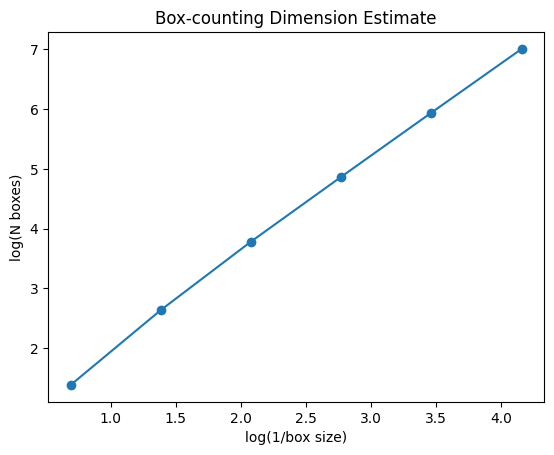

In [25]:
import numpy as np

def box_count(image, k):
    size = image.shape[0]
    box_size = size // k
    count = 0
    for i in range(k):
        for j in range(k):
            if image[i*box_size:(i+1)*box_size, j*box_size:(j+1)*box_size].sum() > 0:
                count += 1
    return count

# Try different box divisions
ks = [2, 4, 8, 16, 32, 64]
counts = [box_count(image.numpy(), k) for k in ks]

# Log–log plot
plt.figure()
plt.plot(np.log(ks), np.log(counts), 'o-')
plt.xlabel('log(1/box size)')
plt.ylabel('log(N boxes)')
plt.title('Box-counting Dimension Estimate')
plt.show()